## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(study_results)
print(mouse_metadata)

# Combine the data into a single dataset

# Display the data table for preview


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16

In [9]:
# Checking the number of mice.
number_of_mice = study_results['Mouse ID'].count()
number_of_mice




1893

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = pd.DataFrame(study_results, columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Metastatic Sites'])





In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df_duplicates_removed = pd.DataFrame.drop_duplicates(df)
df.drop_duplicates(subset=['Mouse ID'])
#print(df_duplicates_removed)
df


#df.drop_duplicates(subset=['brand', 'style'], keep='last')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [28]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = df.count()
number_of_mice_cleaned

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


Volume_mean = df['Tumor Volume (mm3)'].mean()
Volume_median = df['Tumor Volume (mm3)'].median()
Volume_variance = df['Tumor Volume (mm3)'].var()
Volume_standard_deviation = df['Tumor Volume (mm3)'].std()
Volume_SEM = df['Tumor Volume (mm3)'].sem()



df["Volume_mean"] = Volume_mean
df["Volume_median"] = Volume_median
df["Volume_variance"] = Volume_variance
df["Volume_standard_deviation"] = Volume_standard_deviation
df["Volume_SEM"] = Volume_SEM

df.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Volume_mean,Volume_median,Volume_variance,Volume_standard_deviation,Volume_SUM,Volume_SEM
0,b128,0,45.0,0,50.448381,48.951474,79.116074,8.894722,95498.784535,0.204436
1,f932,0,45.0,0,50.448381,48.951474,79.116074,8.894722,95498.784535,0.204436
2,g107,0,45.0,0,50.448381,48.951474,79.116074,8.894722,95498.784535,0.204436
3,a457,0,45.0,0,50.448381,48.951474,79.116074,8.894722,95498.784535,0.204436
4,c819,0,45.0,0,50.448381,48.951474,79.116074,8.894722,95498.784535,0.204436


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df['Timepoint'].agg()


""


## Bar and Pie Charts

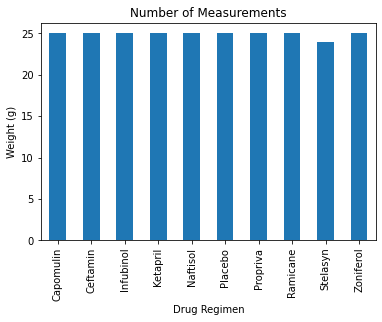

<Figure size 432x288 with 0 Axes>

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#bar_graph_data = df


df_mouse_metadata = mouse_metadata.groupby('Drug Regimen')

# Find out how many of each gender took bike trips
Number_measurements = df_mouse_metadata['Weight (g)'].count()


# Chart our data, give it a title, and label the axes
measurement_chart = Number_measurements.plot(kind="bar", title="Number of Measurements")
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Weight (g)")

plt.show()
plt.tight_layout()

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


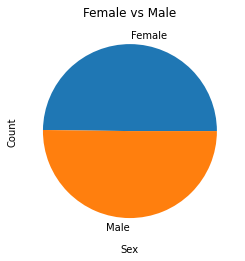

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

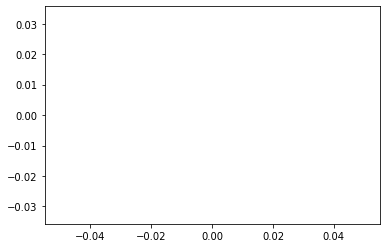

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



df_mouse_metadata = mouse_metadata.groupby(['Sex'])

# Find out how many of each gender took bike trips
Number_measurements = df_mouse_metadata['Mouse ID'].count()


# Chart our data, give it a title, and label the axes
measurement_chart = Number_measurements.plot(kind="pie", y='Sex', title="Female vs Male")
measurement_chart.set_xlabel("Sex")
measurement_chart.set_ylabel("Count")

plt.show()
plt.axis("equal")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

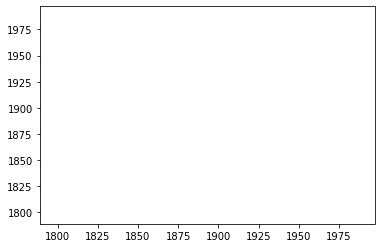

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Mouse_count_capomulin = mouse_metadata.loc[mouse_metadata['Drug Regimen'] == 'Capomulin', ["Mouse ID"]]
Volume_total = df['Tumor Volume (mm3)'].count()
Timepoint_total = df['Timepoint'].count()



Volume_plot, = plt.plot(Timepoint_total, Volume_total , color="blue", label="Time point" )



# Create a legend for our chart
#plt.legend(handles=[Timepoint_total, Volume_total], loc="best")

# Show the chart
plt.show()


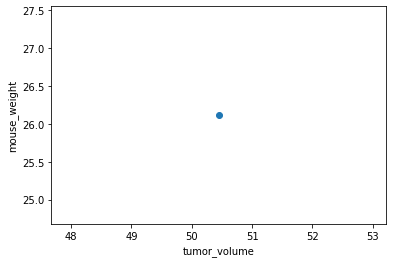

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_volume = df['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_metadata['Weight (g)'].mean()
plt.scatter(tumor_volume,mouse_weight)
plt.xlabel("tumor_volume")
plt.ylabel("mouse_weight")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
